# import library
library yang digunakan

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # making plots from data
import plotly.express as px # graphing interactive map from data

from wordcloud import WordCloud, STOPWORDS
import collections

# Load dataset
Read dan import dataset in csv files

In [ ]:
df2018 = pd.read_csv('shootings_2018.csv')
df2019 = pd.read_csv('shootings_2019.csv')
df2020 = pd.read_csv('shootings_2020.csv')
df2021 = pd.read_csv('shootings_2021.csv')
df2022 = pd.read_csv('shootings_2022.csv')
merge_dfyear = pd.concat([df2018, df2019, df2020, df2021, df2022])

merge_dfyear.reset_index(drop=True, inplace=True)

merge_dfyear.tail()

,Date,State,Dead,Injured,Total,Description
2351,01/01/2022,Georgia,1,3,4,After officers were dispatched to respond to a...
2352,01/01/2022,Wisconsin,1,3,4,"A man was killed, and three others wounded, in..."
2353,01/01/2022,Indiana,0,4,4,Four people were wounded at a shooting at a Ne...
2354,01/01/2022,Colorado,2,2,4,"Two adults were killed, and two wounded, in an..."
2355,01/01/2022,Missouri,0,4,4,Four adults were wounded in the early morning ...


# Data Cleaning
Cek dan Find null value in dataframe

In [ ]:
merge_dfyear.isnull().sum()

Date           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

mencari total dari jumlah injured dan jumlah kill yang tidak sesuai dengan jumlah di kolom total

In [ ]:
merge_dfyear.shape

error_kolom = merge_dfyear[(merge_dfyear['Dead'] + merge_dfyear['Injured'] ) != merge_dfyear['Total']]
print(error_kolom)

merge_dfyear = merge_dfyear[~((merge_dfyear['Dead'] + merge_dfyear['Injured'] ) != merge_dfyear['Total'])]

            Date           State  Dead  Injured  Total  \
33    11/11/2018         Arizona     3        3      5   
723   16/02/2019     Mississippi     4        0      5   
1555  19/09/2021  South Carolina     1        7      7   
1958  26/03/2021        Virginia     2        8      8   

                                            Description  
33    Three people were killed and one injured when ...  
723   Police responded to a domestic dispute at a re...  
1555  After an argument escalated someone opened fir...  
1958  Eight people were injured after a fight led to...  


In [ ]:
merge_dfyear.shape

error_kolom2 = merge_dfyear[(merge_dfyear['Dead'] + merge_dfyear['Injured'] ) != merge_dfyear['Total']]
# print(error_kolom2)

# Detail dan Basic Statistics
Mengetahui nama dan tipe data kolom, describe detail

In [ ]:
print(merge_dfyear.info())
print('\nTipe data kolomn')
print(merge_dfyear.dtypes)
print('\n================================\n')
print(merge_dfyear.columns)
print('\nBasic Statistics')
merge_dfyear.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2352 non-null   object
 1   State        2352 non-null   object
 2   Dead         2352 non-null   int64 
 3   Injured      2352 non-null   int64 
 4   Total        2352 non-null   int64 
 5   Description  2352 non-null   object
dtypes: int64(3), object(3)
memory usage: 128.6+ KB
None

Tipe data kolomn
Date           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object


Index(['Date', 'State', 'Dead', 'Injured', 'Total', 'Description'], dtype='object')

Basic Statistics


,Dead,Injured,Total
count,2352.000000,2352.000000,2352.000000
mean,1.040391,4.078656,5.119048
std,1.576783,2.308091,2.574345
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,23.000000,27.000000,46.000000


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(merge_dfyear.shape[0],merge_dfyear.shape[1]))

print("There are {} states in this dataset such as {}... \n".format(len(merge_dfyear.State.unique()),
                                                                           ", ".join(merge_dfyear.State.unique()[0:5])))

There are 2352 observations and 6 features in this dataset. 

There are 53 states in this dataset such as Ohio, Missouri, Louisiana, Nevada, Maryland... 



# Daerah atau negara bagian mana yang paling banyak terjadi penembakan

In [ ]:
most_shot_state_graph = merge_dfyear['State'].value_counts()

print(most_shot_state_graph)

Illinois                        249
California                      185
Texas                           177
Florida                         125
Pennsylvania                    113
Louisiana                       112
New York                        108
Ohio                             86
Georgia                          82
Michigan                         78
North Carolina                   78
Missouri                         75
Maryland                         73
Tennessee                        68
Alabama                          68
South Carolina                   62
New Jersey                       48
Virginia                         47
Indiana                          46
Mississippi                      44
Colorado                         41
Wisconsin                        35
Arkansas                         33
Washington, D.C.                 29
Kentucky                         28
Arizona                          25
Minnesota                        23
Washington                  

In [ ]:
df_count = merge_dfyear.groupby(['State']).size().reset_index(name='Incidents')

code = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
    'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','VI','UT','VA','WA',
    'WA','WA','WV','WI','WY'] 

df = df_count.assign(Codes=code)
df_count2 = merge_dfyear.groupby(['State'])['Total'].sum().reset_index()
dff = pd.merge(df, df_count2, how="left", on="State")


dff.head()

,State,Incidents,Codes,Total
0,Alabama,68,AL,329
1,Alaska,4,AK,18
2,Arizona,25,AZ,153
3,Arkansas,33,AR,171
4,California,185,CA,973


Visualisasi total kasus tiap negara bagian

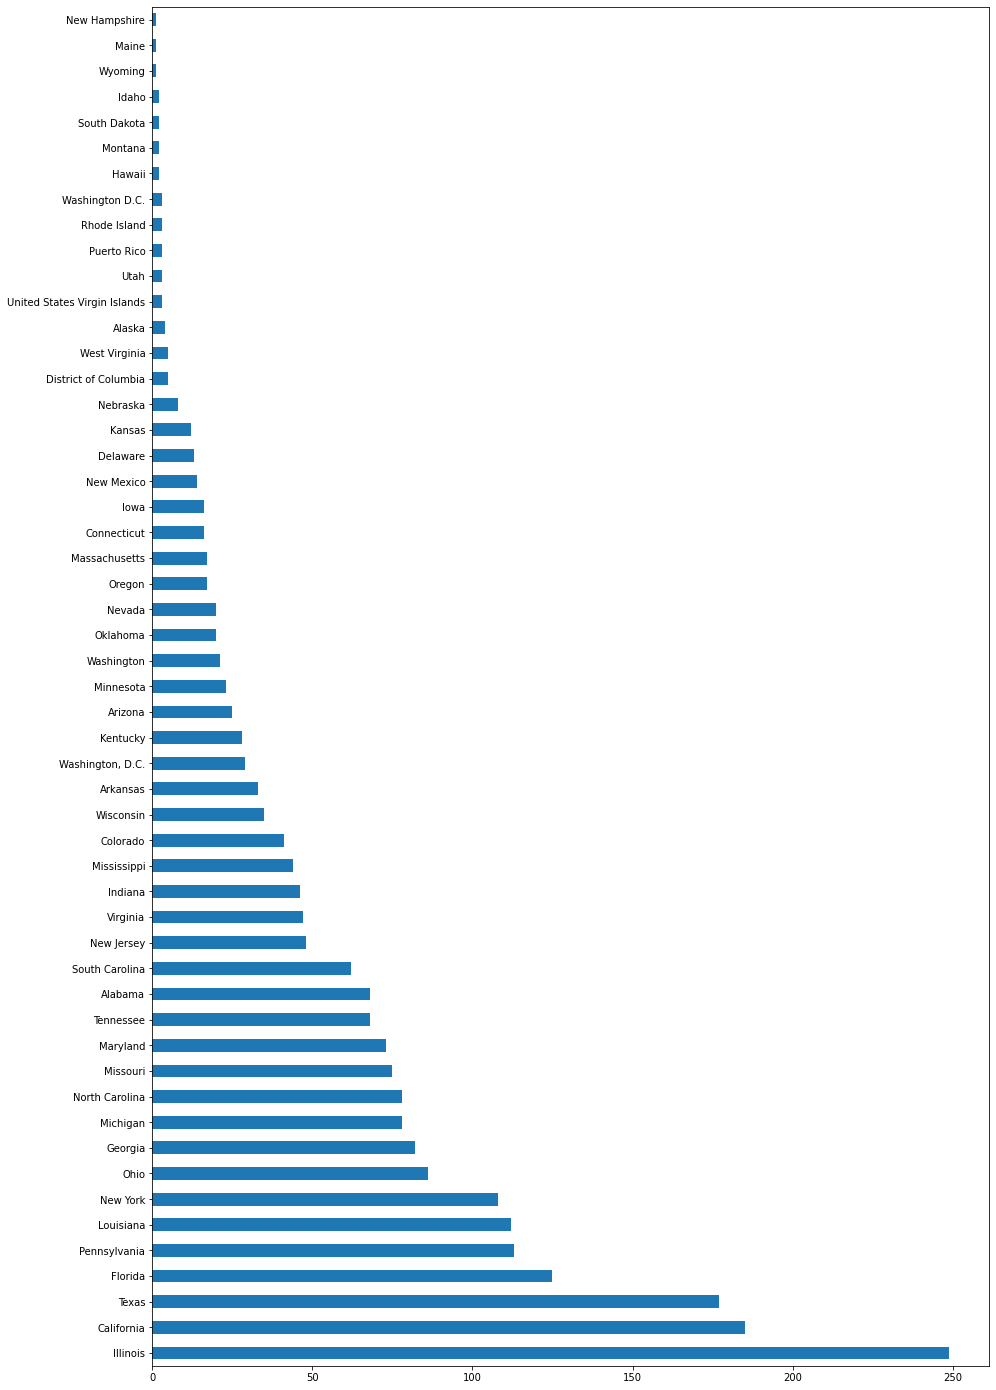

In [ ]:
most_shot_state_graph.plot.barh(figsize=(15,25)).rot=90;

In [ ]:
fig = px.choropleth(dff, 
                    locations="Codes",
                    color="Incidents",
                    color_continuous_scale=px.colors.sequential.Cividis_r,
                    hover_name="State",
                    scope='usa',
                    locationmode = 'USA-states')
                    
fig.update_layout(title_text = 'Incidents Map since 2018 by State',)


fig.show()

Visualisasi total korban tiap negara bagian

In [ ]:
fig = px.choropleth(dff, 
                    locations="Codes",
                    color="Total",
                    labels={'Total':'Total Victim'},
                    color_continuous_scale=px.colors.sequential.Cividis_r,
                    hover_name="State",
                    scope='usa',
                    locationmode = 'USA-states')
                    
fig.update_layout(title_text = 'Total Victim Map since 2018 by State',)

fig.show()


# Feature Extraction
Membuat tabel baru mengenai data tiap negara bagian, berkaitan dengan aturan penggunaan senjata api di tahun 2017

Kemudian, mengelompokan jumlah aturan menjadi 3 kelas yaitu Ketat, Sedang dan Longgar

<BarContainer object of 50 artists>

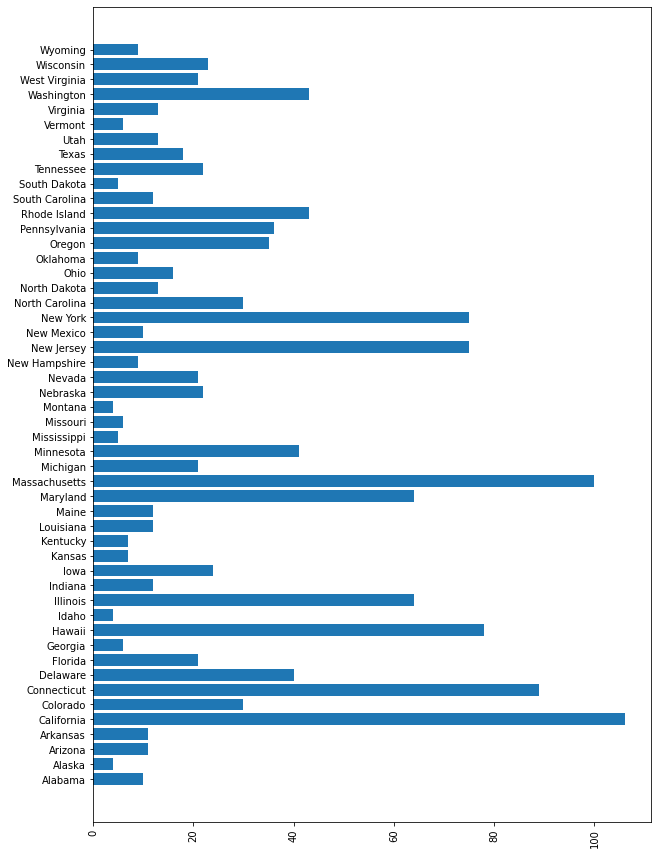

In [ ]:
df_law = pd.read_csv('raw_data.csv')

df_law2 = df_law.loc[df_law.year == 2017]

total_data = pd.DataFrame(df_law2)
plt.figure(figsize=(10,15))
plt.xticks(rotation=90)
plt.barh(df_law2.state,df_law2.lawtotal)

In [ ]:
df_law3 = df_law2[['state', 'lawtotal']].reset_index(drop=True)
# df.loc[df["gender"] == "male", "gender"] = 1

# df_law3['lawtotal'] = np.where((df_law3['lawtotal']<))

def f(row):
    if row['lawtotal'] < 30:
        val = 'Rendah'
    elif row['lawtotal'] < 65:
        val = 'Sedang'
    else:
        val = 'Ketat'
    return val

df_law3['Keketatan Regulasi'] = df_law3.apply(f, axis=1)

print(df_law3)



             state  lawtotal Keketatan Regulasi
0          Alabama        10             Rendah
1           Alaska         4             Rendah
2          Arizona        11             Rendah
3         Arkansas        11             Rendah
4       California       106              Ketat
5         Colorado        30             Sedang
6      Connecticut        89              Ketat
7         Delaware        40             Sedang
8          Florida        21             Rendah
9          Georgia         6             Rendah
10          Hawaii        78              Ketat
11           Idaho         4             Rendah
12        Illinois        64             Sedang
13         Indiana        12             Rendah
14            Iowa        24             Rendah
15          Kansas         7             Rendah
16        Kentucky         7             Rendah
17       Louisiana        12             Rendah
18           Maine        12             Rendah
19        Maryland        64            

# Sering terjadinya penembakan di tanggal apa

Berdasarkan Hari

In [ ]:
merge_dfyear['DateConvert'] = pd.to_datetime(merge_dfyear['Date'])
merge_dfyear['DayOfWeek'] = merge_dfyear['DateConvert'].dt.day_name()


merge_dfyear['Date'] = pd.to_datetime(merge_dfyear['Date'])
dftime = merge_dfyear['Date'].iloc[0]
merge_dfyear['Day'] = merge_dfyear['Date'].apply(lambda time: time.day)
merge_dfyear['Month'] = merge_dfyear['Date'].apply(lambda time: time.month)
merge_dfyear['Year'] = merge_dfyear['Date'].apply(lambda time: time.year)

print(merge_dfyear['DayOfWeek'].value_counts().sort_index(axis=0))

# print("\n DAY DAY DAY")
print(merge_dfyear['Month'])

Friday       299
Monday       288
Saturday     459
Sunday       517
Thursday     271
Tuesday      264
Wednesday    254
Name: DayOfWeek, dtype: int64
0       12
1       12
2       12
3       12
4       12
        ..
2351     1
2352     1
2353     1
2354     1
2355     1
Name: Month, Length: 2352, dtype: int64


Visualisasi dalam bentuk barchart

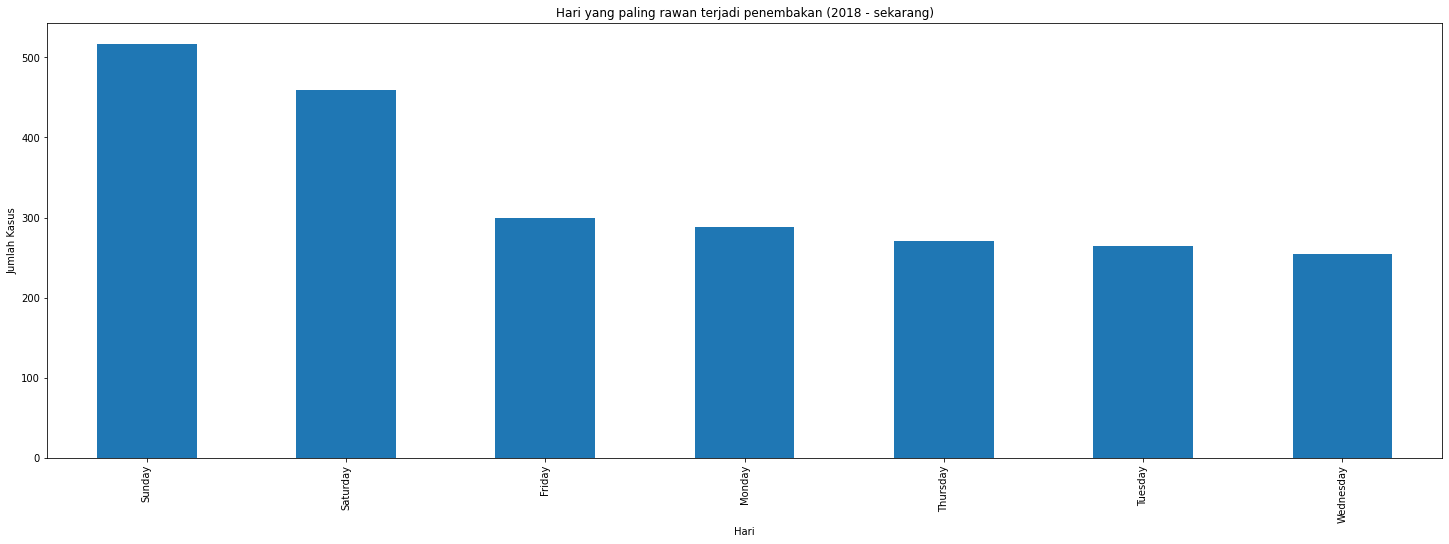

In [ ]:
merge_dfyear['DayOfWeek'].value_counts().plot.bar(figsize=(25, 8), title="Hari yang paling rawan terjadi penembakan (2018 - sekarang)", xlabel="Hari", ylabel="Jumlah Kasus")

Berdasarkan Bulan

In [ ]:
dmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
merge_dfyear['Month']= merge_dfyear['Month'].map(dmap)


print(merge_dfyear)

KeyError: ignored

Visualisasi dalam bentuk barchart

AxesSubplot(0.125,0.125;0.775x0.755)


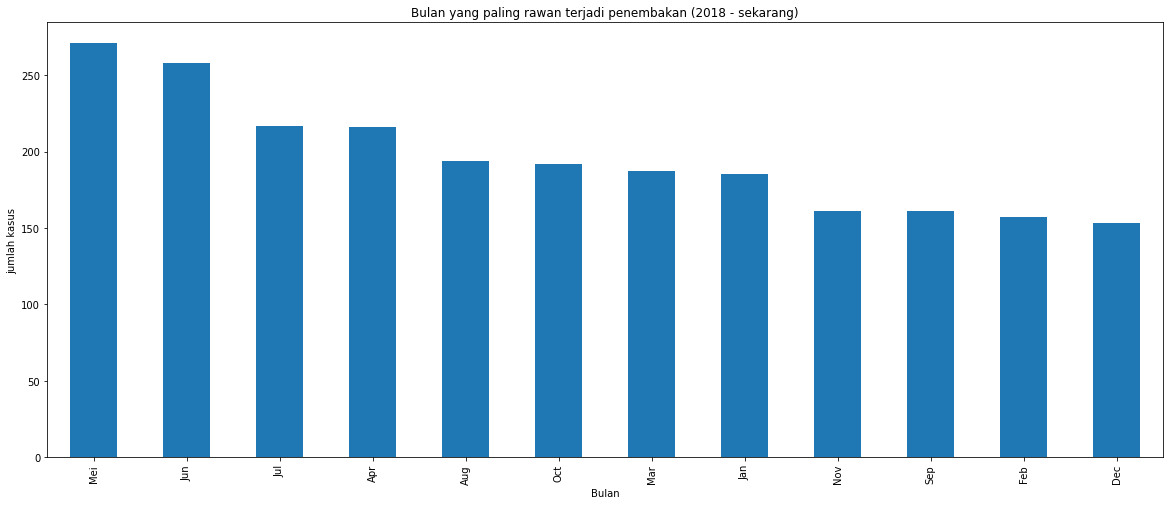

In [ ]:
print(merge_dfyear['Month'].value_counts().plot.bar(figsize=(20,8), title = "Bulan yang paling rawan terjadi penembakan (2018 - sekarang)", xlabel = "Bulan", ylabel = "jumlah kasus"))

Visualisasi Berdasarkan Tahun dengan barchart

AxesSubplot(0.125,0.125;0.775x0.755)


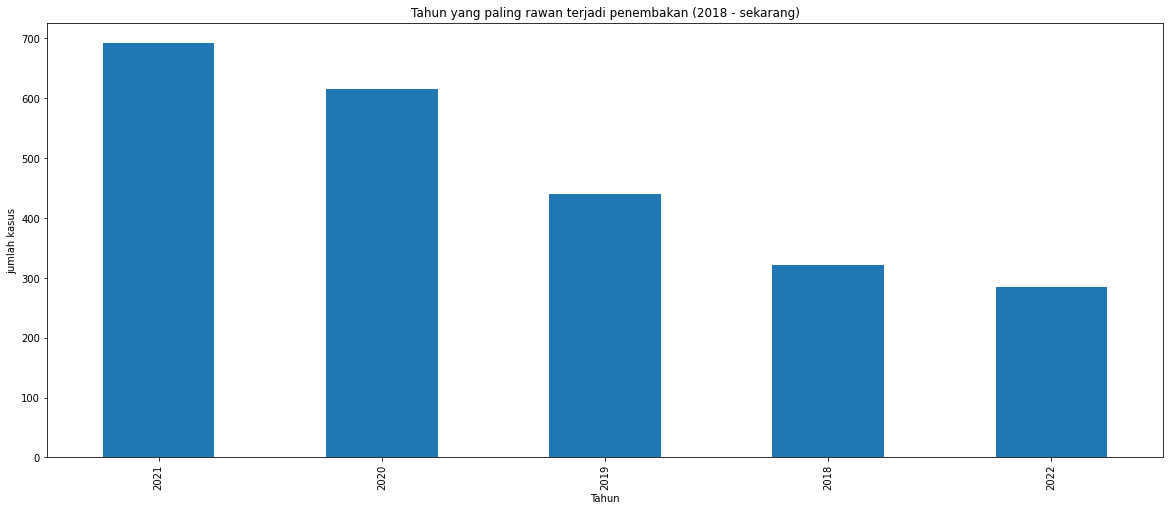

In [ ]:
print(merge_dfyear['Year'].value_counts().plot.bar(figsize=(20,8), title = "Tahun yang paling rawan terjadi penembakan (2018 - sekarang)", xlabel = "Tahun", ylabel = "jumlah kasus"))

Berdasarkan Musim

In [ ]:
# print(merge_dfyear['Month'])
# mass_shooting_spring = merge_dfyear['Month'].str.contains("Jan | Feb")
mass_shooting_spring = merge_dfyear['Month'].loc[merge_dfyear['Month'].str.contains("Mar|Apr|Mei", case = False) ]
mass_shooting_summer = merge_dfyear['Month'].loc[merge_dfyear['Month'].str.contains("Jun|Jul|Aug", case = False) ]
mass_shooting_fall = merge_dfyear['Month'].loc[merge_dfyear['Month'].str.contains("Sep|Oct|Nov", case = False) ]
mass_shooting_winter = merge_dfyear['Month'].loc[merge_dfyear['Month'].str.contains("Dec|Jan|Feb", case = False) ]

mass_shooting_spring_val = mass_shooting_spring.value_counts()
mass_shooting_summer_val = mass_shooting_summer.value_counts()
mass_shooting_fall_val = mass_shooting_fall.value_counts()
mass_shooting_winter_val = mass_shooting_winter.value_counts()

data = {'Semi':sum(mass_shooting_spring_val), 'Panas':sum(mass_shooting_summer_val), 'Gugur':sum(mass_shooting_fall_val), 'Dingin':sum(mass_shooting_winter_val)}
musim = list(data.keys())
value = list(data.values())

data


{'Dingin': 495, 'Gugur': 514, 'Panas': 669, 'Semi': 674}

Visualisasi dengan barchart

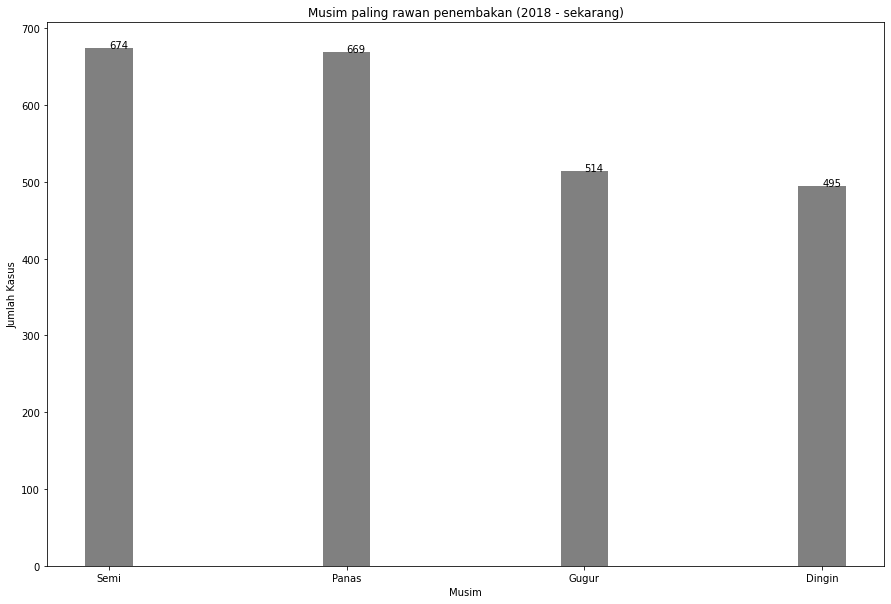

In [ ]:
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(musim, value, color =  "grey",
        width = 0.2)
for a,b in zip(musim, value): 
    plt.text(a, b, str(b))
plt.xlabel("Musim")
plt.ylabel("Jumlah Kasus")
plt.title("Musim paling rawan penembakan (2018 - sekarang)")
plt.show()

Berdasarkan Public Holiday in US

In [ ]:
merge_dfyear['Converted_Dates'] = merge_dfyear['Date'].dt.strftime('%d/%m/%y')
mass_shooting_newyear = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("01/01/18|01/01/19|01/01/20|01/01/21|01/01/22", case = False) ]
mass_shooting_christmas = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("25/12/18|25/12/19|25/12/20|25/12/21|25/12/22",  case = False)]
mass_shooting_thanksgiving = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("22/11/18|28/11/19|26/11/20|25/11/21|24/11/22",  case = False)]
mass_shooting_mothersday = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("13/05/18|12/05/19|10/05/20|09/05/21|08/05/22",  case = False)]
mass_shooting_easter = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("01/04/18|21/04/19|12/04/20|04/04/21|17/04/22",  case = False)]
mass_shooting_independenceday = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("04/07/18|04/07/19|04/07/20|04/07/21|04/07/22",  case = False)]
mass_shooting_saintpatrick = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("17/03/18|17/03/19|17/03/20|17/03/21|17/03/22", case = False) ]
mass_shooting_valentine = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("14/02/18|14/02/19|14/02/20|14/02/21|14/02/22", case = False) ]
mass_shooting_father = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("17/06/18|16/06/19|21/06/20|20/06/21|19/06/22", case = False) ]
mass_shooting_halloween = merge_dfyear['Converted_Dates'].loc[merge_dfyear['Converted_Dates'].str.contains("31/10/18|31/10/19|31/10/20|31/10/21|31/10/22", case = False) ]

data2 = {'New Year':sum(mass_shooting_newyear.value_counts()), 'Valentine':sum(mass_shooting_valentine.value_counts()), 'Saint Patrick':sum(mass_shooting_saintpatrick.value_counts()), 'Easter':sum(mass_shooting_easter.value_counts()), 
        'Mother\'s Day':sum(mass_shooting_mothersday.value_counts()), 'Father\'s Day':sum(mass_shooting_father.value_counts()), 
        'Independence Day':sum(mass_shooting_independenceday.value_counts()), 'Halloween':sum(mass_shooting_halloween.value_counts()), 
        'Thanksgiving': sum(mass_shooting_thanksgiving.value_counts()), 'Christmas': sum(mass_shooting_christmas.value_counts())}
holiday = list(data2.keys())
value = list(data2.values())

data2

{'Christmas': 6,
 'Easter': 14,
 "Father's Day": 21,
 'Halloween': 13,
 'Independence Day': 8,
 "Mother's Day": 13,
 'New Year': 19,
 'Saint Patrick': 10,
 'Thanksgiving': 4,
 'Valentine': 3}

Visualisasi dengan barchart

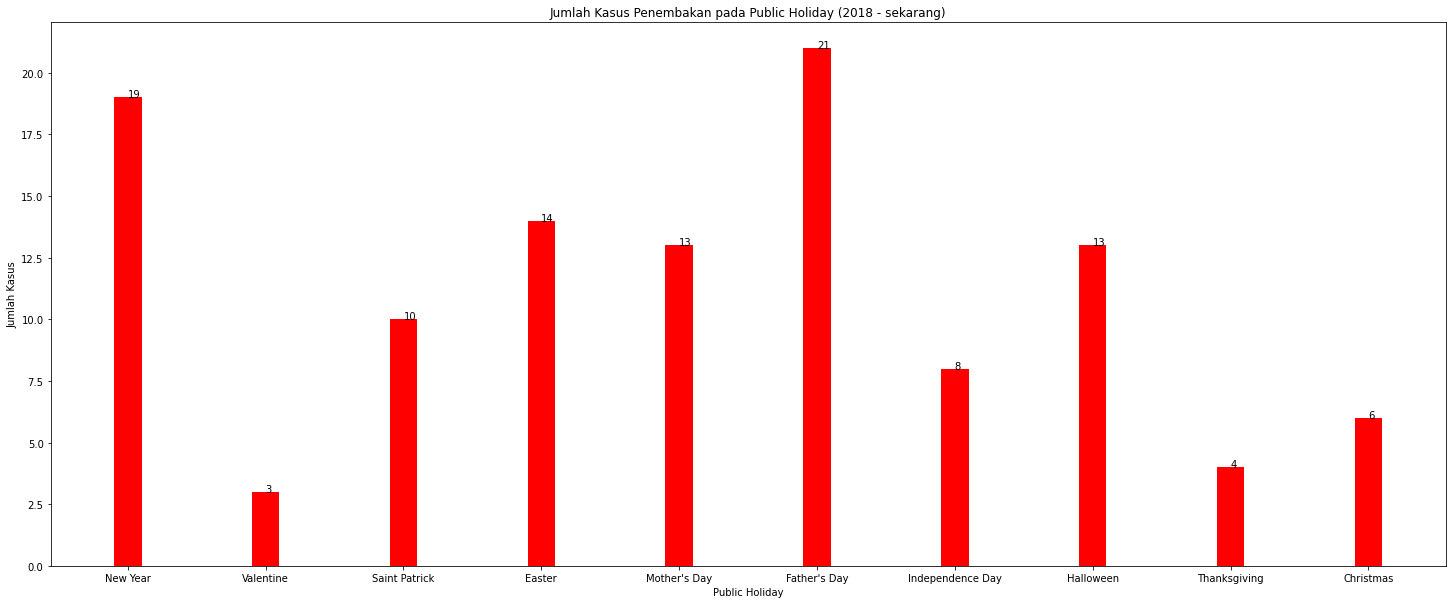

In [ ]:
fig = plt.figure(figsize = (25, 10))
 
# creating the bar plot
plt.bar(holiday, value, color =  "red",
        width = 0.2)
for a,b in zip(holiday, value): 
    plt.text(a, b, str(b))
plt.xlabel("Public Holiday")
plt.ylabel("Jumlah Kasus")
plt.title("Jumlah Kasus Penembakan pada Public Holiday (2018 - sekarang)")
plt.show()

# Menganalisis kolom description menggunakan Text analysis


In [ ]:
print(merge_dfyear['Description'])

merge_dfyear.shape

0       A dispute began at a rented Airbnb during a Ne...
1       One person was killed and three people were wo...
2       A gunman shot and killed his girlfriend, her t...
3       Three people were killed and two others were w...
4       Seven people were wounded during a shooting at...
                              ...                        
2351    After officers were dispatched to respond to a...
2352    A man was killed, and three others wounded, in...
2353    Four people were wounded at a shooting at a Ne...
2354    Two adults were killed, and two wounded, in an...
2355    Four adults were wounded in the early morning ...
Name: Description, Length: 2352, dtype: object


(2352, 12)

Melakukan filtering atau clustering dengan kata yang menandakan sebuah gender atau jenis kelamin. Kemudian, menyatukan dengan dataframe

In [ ]:
# desc_has_gender = merge_dfyear.loc[merge_dfyear['Description'].str.contains(" woman | man | women | men | girlfriend | boyfriend | daugther | son | brother | sister | father | mother | girl | boy | gunmen ", case=False)]

merge_dfyear['gender'] = merge_dfyear['Description'].str.contains(" woman | man | women | men | girlfriend | boyfriend | daugther | son | brother | sister | father | mother | girl | boy | gunman | gunmen ", case=True)


desc_has_gender = merge_dfyear.loc[merge_dfyear['gender'] == True]

# desc_has_gender
merge_dfyear

,Date,State,Dead,Injured,Total,Description,DateConvert,DayOfWeek,Day,Month,Year,Converted_Dates,gender
0,2018-12-31,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...,2018-12-31,Monday,31,Dec,2018,31/12/18,True
1,2018-12-29,Ohio,1,3,4,One person was killed and three people were wo...,2018-12-29,Saturday,29,Dec,2018,29/12/18,False
2,2018-12-28,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t...",2018-12-28,Friday,28,Dec,2018,28/12/18,True
3,2018-12-24,Louisiana,2,2,4,Three people were killed and two others were w...,2018-12-24,Monday,24,Dec,2018,24/12/18,False
4,2018-12-23,Missouri,0,7,7,Seven people were wounded during a shooting at...,2018-12-23,Sunday,23,Dec,2018,23/12/18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2022-01-01,Georgia,1,3,4,After officers were dispatched to respond to a...,2022-01-01,Saturday,1,Jan,2022,01/01/22,True
2352,2022-01-01,Wisconsin,1,3,4,"A man was killed, and three others wounded, in...",2022-01-01,Saturday,1,Jan,2022,01/01/22,True
2353,2022-01-01,Indiana,0,4,4,Four people were wounded at a shooting at a Ne...,2022-01-01,Saturday,1,Jan,2022,01/01/22,False
2354,2022-01-01,Colorado,2,2,4,"Two adults were killed, and two wounded, in an...",2022-01-01,Saturday,1,Jan,2022,01/01/22,False


Dari kolom gender, kami mencari gender pelaku dengan mencari kata yang menandakan hal yang dilakukan atau merujuk pada pelaku.

In [ ]:
# mencari gender pelaku menggunakan pattern
merge_dfyear['pelaku_gender'] = merge_dfyear['Description'].str.contains("man killed | men killed |man shot |man wounded |men wounded | a man | a men | a gunman | gunmen ", case=False)

# pelakuu = merge_dfyear.loc[merge_dfyear['pelaku_gender'] == True]

# error_gen = merge_dfyear[merge_dfyear['gender'] != merge_dfyear['pelaku_gender']]

# error_gen

merge_dfyear
# pelakuu

,Date,State,Dead,Injured,Total,Description,DateConvert,DayOfWeek,Day,Month,Year,Converted_Dates,gender,pelaku_gender
0,2018-12-31,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...,2018-12-31,Monday,31,Dec,2018,31/12/18,True,False
1,2018-12-29,Ohio,1,3,4,One person was killed and three people were wo...,2018-12-29,Saturday,29,Dec,2018,29/12/18,False,False
2,2018-12-28,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t...",2018-12-28,Friday,28,Dec,2018,28/12/18,True,True
3,2018-12-24,Louisiana,2,2,4,Three people were killed and two others were w...,2018-12-24,Monday,24,Dec,2018,24/12/18,False,False
4,2018-12-23,Missouri,0,7,7,Seven people were wounded during a shooting at...,2018-12-23,Sunday,23,Dec,2018,23/12/18,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2022-01-01,Georgia,1,3,4,After officers were dispatched to respond to a...,2022-01-01,Saturday,1,Jan,2022,01/01/22,True,True
2352,2022-01-01,Wisconsin,1,3,4,"A man was killed, and three others wounded, in...",2022-01-01,Saturday,1,Jan,2022,01/01/22,True,False
2353,2022-01-01,Indiana,0,4,4,Four people were wounded at a shooting at a Ne...,2022-01-01,Saturday,1,Jan,2022,01/01/22,False,False
2354,2022-01-01,Colorado,2,2,4,"Two adults were killed, and two wounded, in an...",2022-01-01,Saturday,1,Jan,2022,01/01/22,False,False


Menganalisis kombinasi kata yang ada dan menampilkan kata yang paling banyak muncul pada kolom ‘Description’.

In [ ]:

text = " ".join(merge_dfyear['Description'])
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 272452 words in the combination of all descriptions.


In [ ]:
# Create stopword list:
stopwords = STOPWORDS

# Generate a word cloud image
wordcloud_desc = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)


filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(50):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))  

Word: people, count: 1114
Word: wounded, count: 1029
Word: killed, count: 865
Word: A, count: 696
Word: injured, count: 693
Word: shooting, count: 691
Word: two, count: 564
Word: Four, count: 538
Word: man, count: 494
Word: three, count: 493
Word: shot, count: 416
Word: others, count: 354
Word: men, count: 332
Word: four, count: 331
Word: one, count: 315
Word: One, count: 284
Word: shooting., count: 271
Word: Two, count: 269
Word: opened, count: 263
Word: early, count: 255
Word: person, count: 236
Word: fire, count: 224
Word: The, count: 219
Word: Five, count: 199
Word: outside, count: 198
Word: morning, count: 185
Word: adults, count: 171
Word: drive-by, count: 167
Word: Three, count: 163
Word: party, count: 157
Word: five, count: 142
Word: woman, count: 137
Word: including, count: 133
Word: found, count: 130
Word: later, count: 125
Word: argument, count: 125
Word: neighborhood., count: 114
Word: police, count: 113
Word: party., count: 112
Word: shooter, count: 110
Word: local, count:

Visualisasi dengan bar chart

<BarContainer object of 50 artists>

<Figure size 1080x720 with 0 Axes>

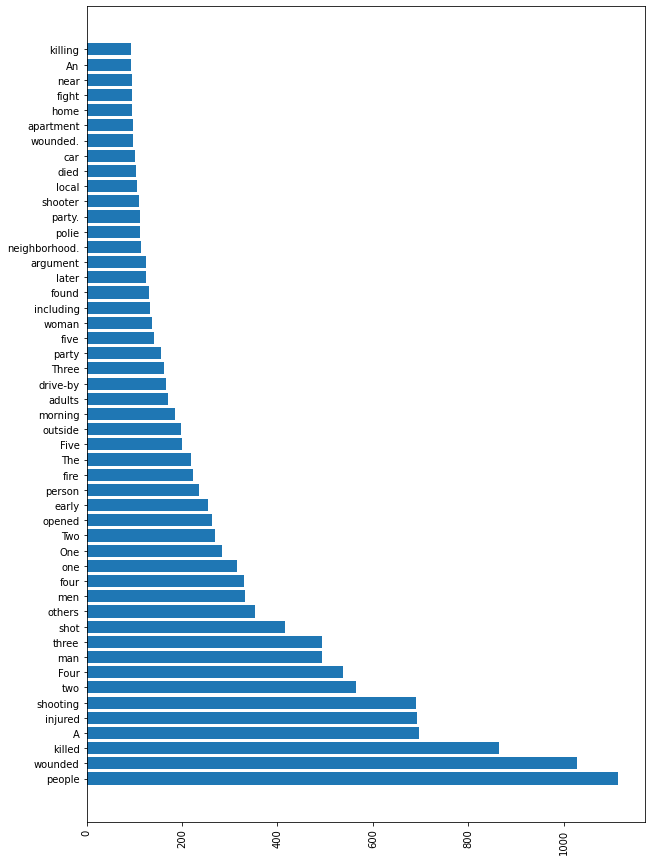

In [ ]:
data = [['people', 1114], ['wounded', 1029], ['killed', 865], ['A', 696], ['injured', 693], ['shooting', 691], ['two', 564], ['Four', 538], ['man', 494], ['three', 493], ['shot', 416], ['others', 354], ['men', 332], ['four', 331], ['one', 315], ['One', 284], ['shooting', 271], ['Two', 269],['opened', 263], ['early', 255], ['person', 236], ['fire', 224], ['The', 219], ['Five', 199], ['outside', 198], ['morning', 185], ['adults', 171], ['drive-by', 167], ['Three', 163], ['party', 157], ['five', 142], ['woman', 137], ['including', 133], ['found', 130], ['later', 125], ['argument', 125], ['neighborhood.', 114], ['polie', 113], ['party.', 112], ['shooter', 110], ['local', 105], ['died', 103], ['car', 102], ['wounded.', 98], ['apartment', 98], ['home', 96], ['fight', 96], ['near', 95], ['An', 94], ['killing', 93]]
dataframetestinguwu = pd.DataFrame(data, columns=['Word', 'Count'])
dataframetestinguwu
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.figure(figsize=(10,15))
plt.xticks(rotation=90)
plt.barh(dataframetestinguwu['Word'],dataframetestinguwu['Count'])

Visualisasi dengan Word Cloud

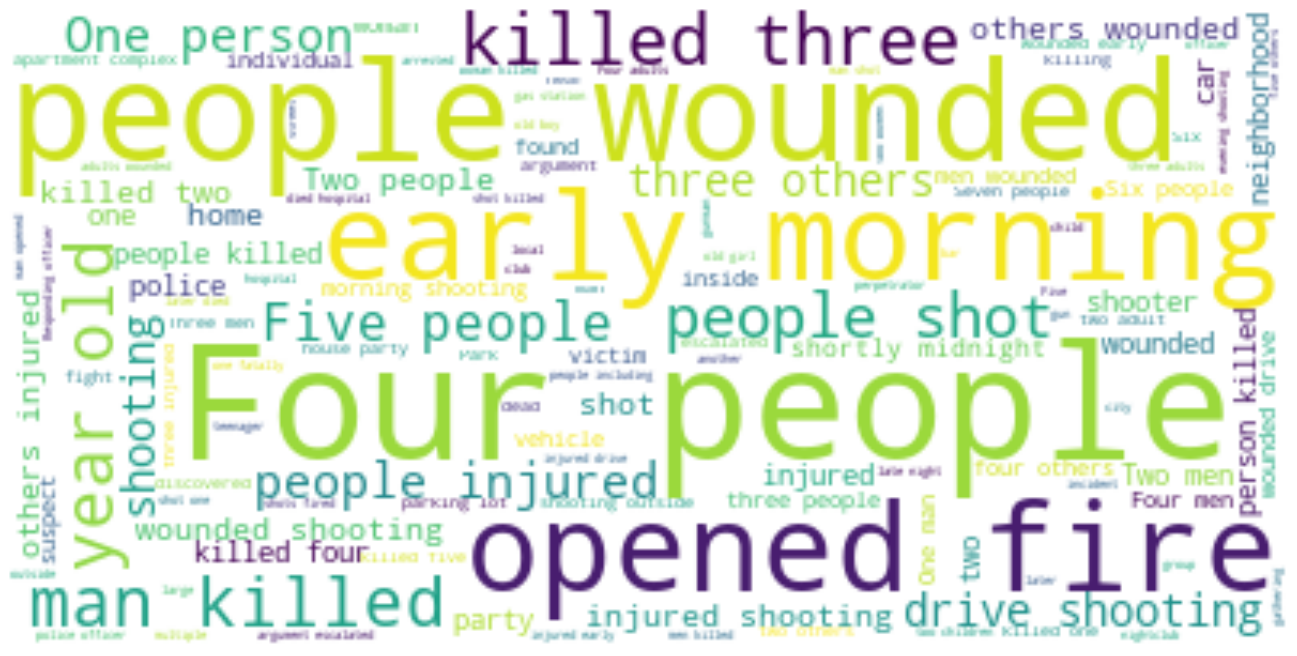

In [ ]:

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (23, 13))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis("off")
plt.show()
